In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as nb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df= pd.read_csv(r'D:\sparks\retail\SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

> # univariet analysis

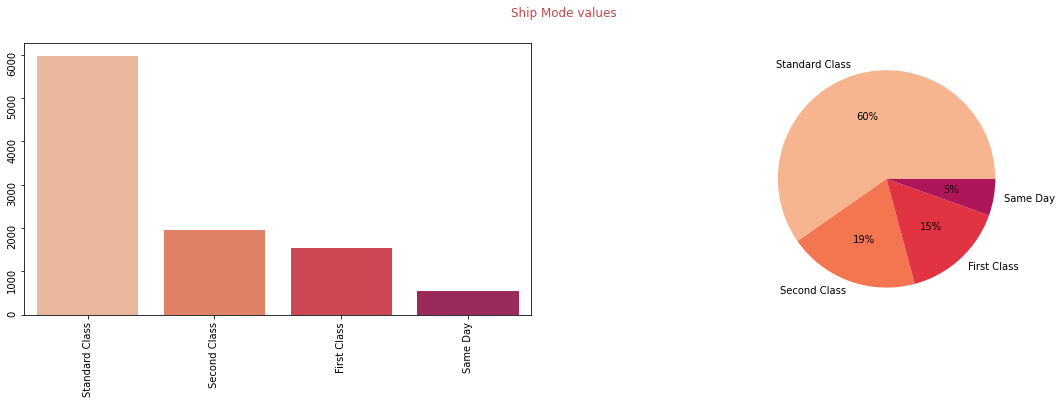

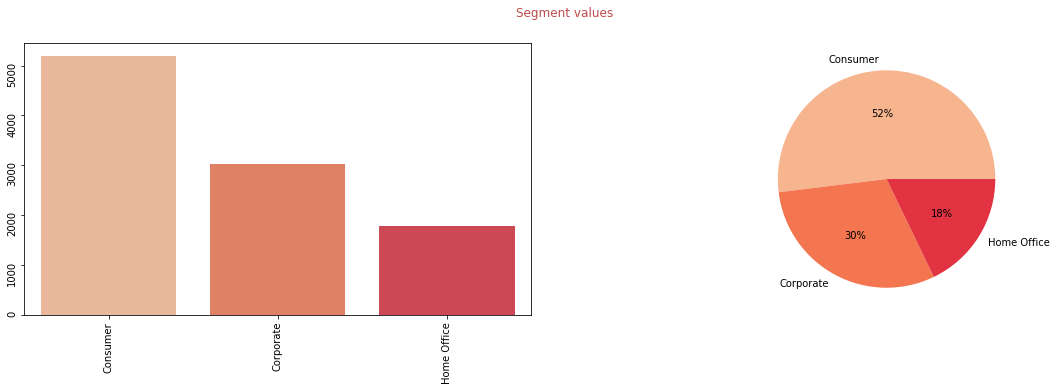

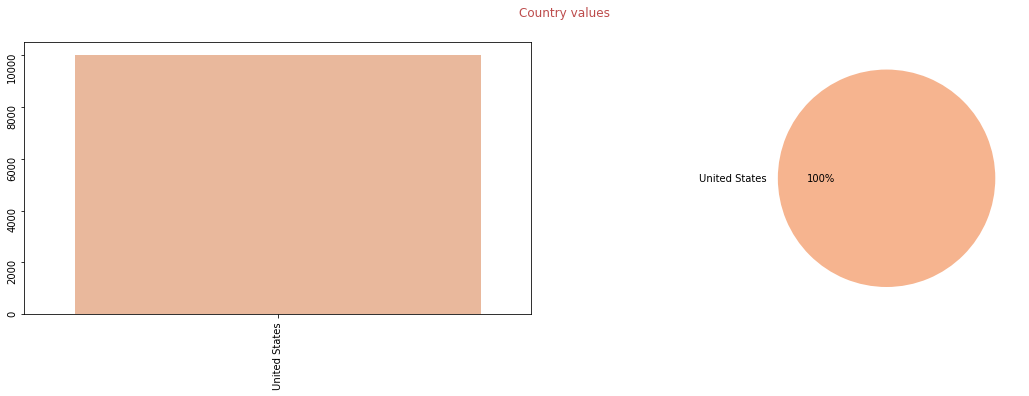

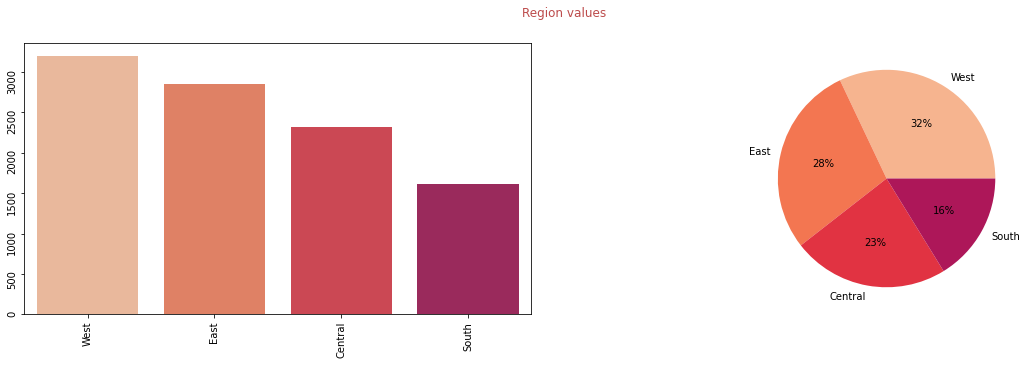

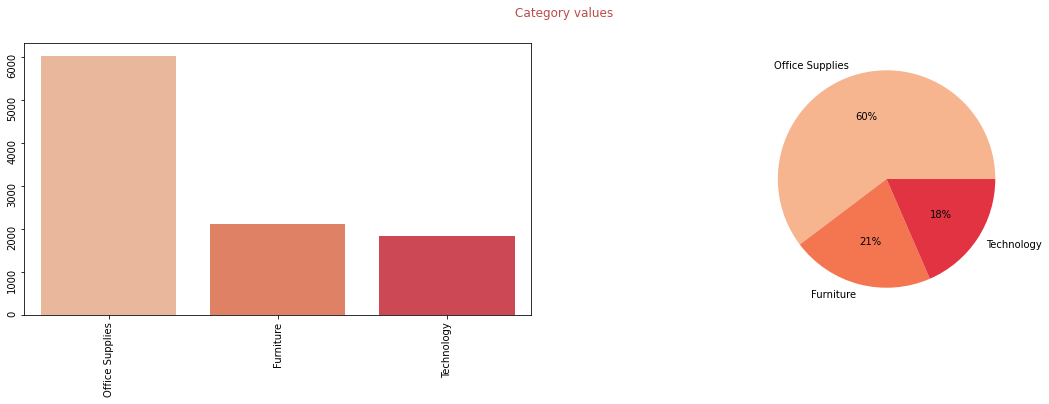

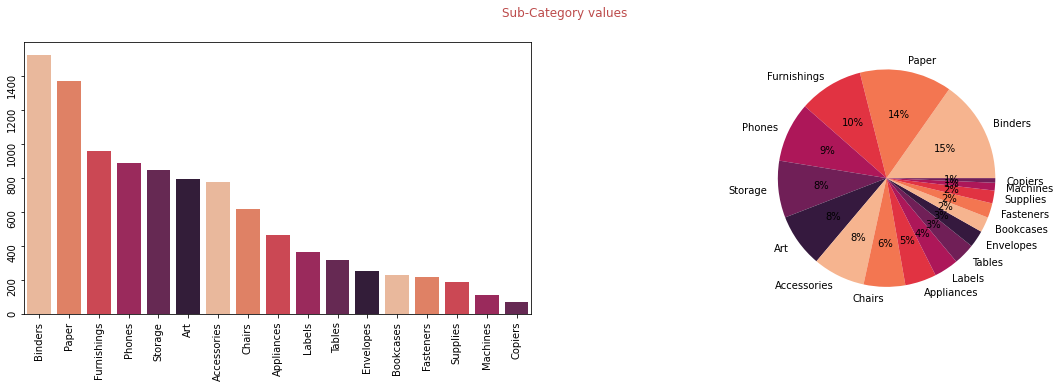

In [7]:
for i in df.select_dtypes(object).drop(['City','State'],axis=1):
    groubed = df[i].value_counts()
    palette_color= sns.color_palette('rocket_r')
    fig,ax = plt.subplots(1,2,figsize =(20,5))
    sns.barplot(x=groubed.index , y=groubed.values , ax=ax[0] , palette=palette_color)
    ax[0].tick_params(labelrotation=90)
    ax[1].pie(data =groubed ,x = groubed.values , labels = groubed.index,colors=palette_color, autopct='%.0f%%')
    plt.suptitle(f'{i} values',c='#BD4C4C')
    plt.show()


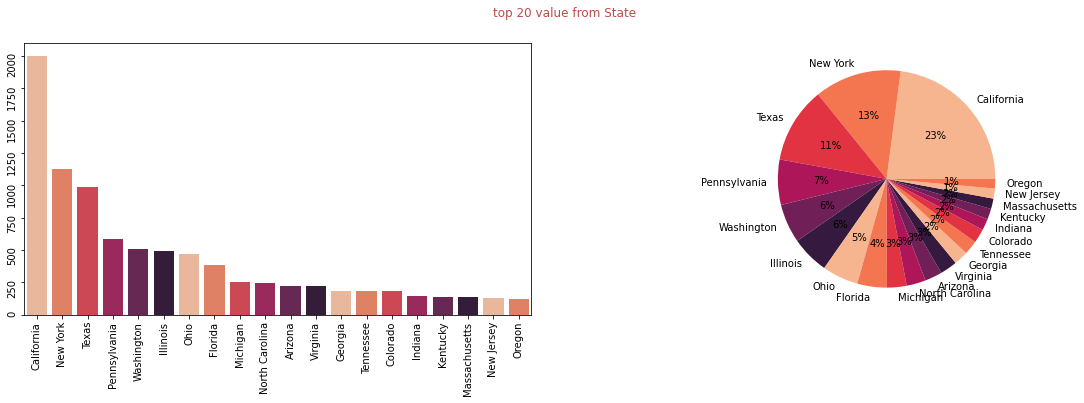

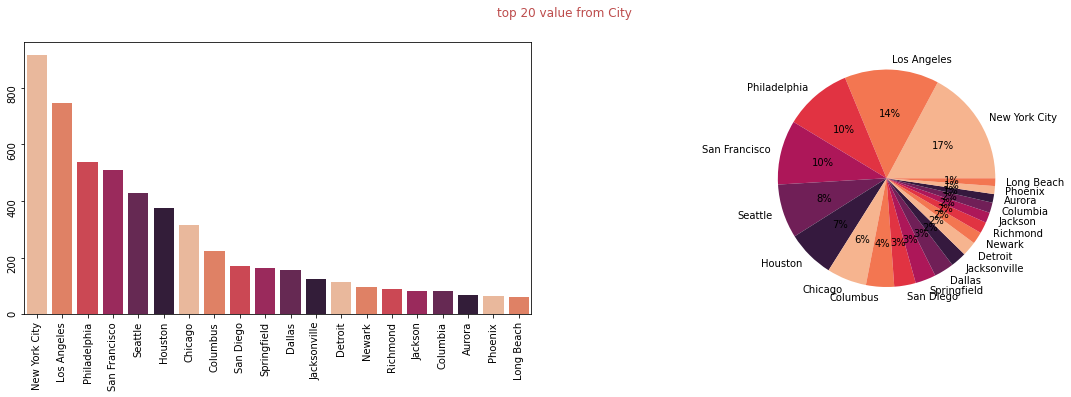

In [8]:

for i in ['State' , 'City']:
    groubed = df[i].value_counts().head(20)
    palette_color= sns.color_palette('rocket_r')
    fig,ax = plt.subplots(1,2,figsize =(20,5))
    sns.barplot(x=groubed.index , y=groubed.values , ax=ax[0] , palette=palette_color)
    ax[0].tick_params(labelrotation=90)
    ax[1].pie(data =groubed ,x = groubed.values , labels = groubed.index,colors=palette_color, autopct='%.0f%%')
    plt.suptitle(f'top 20 value from {i}',c='#BD4C4C')
    plt.show()


In [9]:
del df['Country']
del df['Postal Code']

In [10]:
numeric = df.select_dtypes(exclude=object)

<AxesSubplot:>

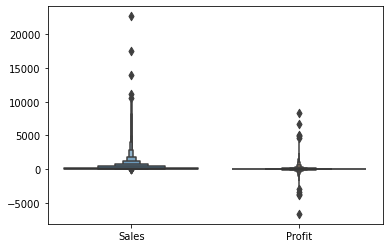

In [11]:
sns.boxenplot(data = numeric[['Sales','Profit']])

In [34]:
df.groupby('State',as_index=False)[['Sales']].sum().sort_values('Sales',ascending=False).head(10)

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


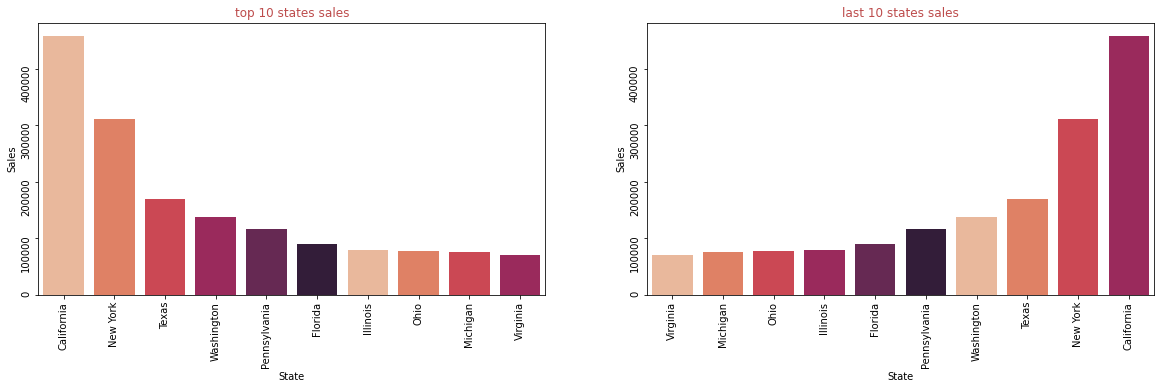

In [41]:
top10 = df.groupby('State',as_index=False)[['Sales']].sum().sort_values('Sales',ascending=False).head(10)
last10 = df.groupby('State',as_index=False)[['Sales']].sum().sort_values('Sales').tail(10)

palette_color= sns.color_palette('rocket_r')
fig,ax = plt.subplots(1,2,figsize =(20,5))
sns.barplot(x=top10['State'] , y=top10['Sales'] , ax=ax[0] , palette=palette_color)
ax[0].set_title(f'top 10 states sales',c='#BD4C4C')
ax[0].tick_params(labelrotation=90)
sns.barplot(x = last10['State'] , y = last10['Sales'], ax=ax[1] , palette=palette_color)
ax[1].tick_params(labelrotation=90)
ax[1].set_title(f'last 10 states sales',c='#BD4C4C')
plt.show()


__Note__
- Country column have one value so i will remove it
- postal code is redundant column so i will remove it